In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# Imports
from common import display_input_data, check_input_data_indices, train_model, prepare_dataset, evaluate_model, \
    run_input_optimizer, calculate_accuracy, calculate_error_rate, run_input_optimizer_2
import pandas as pd
import ipywidgets as widgets
import numpy as np
import pickle


In [28]:
# Parameters
# Chose variables to create the model
input_cols = ['shape', 'profile_entrance','rising_entrance', 'rising_exit', 'shards', 'feathering', 'entrance_mounding', 'center_mounding', 'exit_mounding', 'mounding']
result_col = 'result'
# Load the train and the validation datasets for blade class prediction
train_dataset_file = '../DATA/Train/blade_prediction_train.xlsx'
test_dataset_file = '../DATA/Validation/blade_prediction_validation.xlsx'

In [29]:
# The data are displayed on a table
display_input_data(
    train_dataset_file,
    input_cols
)

,shape_E,shape_indeterminate,profile_entrance_V,rising_entrance_bilateral,rising_entrance_single,rising_exit_bilateral,rising_exit_single,shards_present,feathering_present,entrance_mounding_bilateral,entrance_mounding_single,center_mounding_bilateral,center_mounding_single,exit_mounding_bilateral,exit_mounding_single,mounding_marked,mounding_not marked
0,False,True,True,False,True,False,True,False,False,False,True,False,False,False,True,False,True
1,False,True,False,False,True,True,False,False,False,False,True,False,False,False,True,False,True
2,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True
3,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True
4,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,True,False,True,False,True,False,True,False,False,False,True,False,False,False,True,True,False
276,True,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False
277,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
278,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [30]:
# The two datasets are tested for compatibility 
check_input_data_indices(train_dataset_file, test_dataset_file, input_cols)

Datasets are compatible


In [31]:
# Logistic regression model
model = train_model(
    train_dataset_file,
    input_cols,
    result_col
)

print(model)


filename = '../models/blade-bevel.pickle'
pickle.dump(model, open(filename, 'wb'))

print(f'Saved model to {filename}')

# model
print('b0 = ' + str(model.intercept_))
print('b1...n = ' + str(model.coef_))

LogisticRegression(class_weight='balanced', random_state=58, solver='liblinear')
Saved model to ../models/blade-bevel.pickle
b0 = [3.17996213]
b1...n = [[-2.17423594 -1.56355783 -1.92810362 -0.36351264 -0.24278815 -0.33287886
  -0.17982359  1.00833042  0.42496669 -0.96954455 -0.09515296 -1.14420742
  -0.76750395 -0.54128801  0.46155379  0.77269167  0.38270883]]


In [32]:
# 10 variables were used 
evaluate_model(
    model,
    test_dataset_file,
    input_cols,
    result_col
)

0.7164179104477612

In [33]:
x_train, y_train = prepare_dataset(train_dataset_file, input_cols, result_col)
model.score(x_train, y_train)

0.8142857142857143

In [34]:

y_pred = model.predict(prepare_dataset(test_dataset_file, input_cols))
print(y_pred)

[ True  True False False  True False False  True  True False  True False
  True False False  True False  True False False  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True False  True
 False False False False False False False]


In [35]:
# Test for overfitting
# Evaluation of the training
x_train, y_train = prepare_dataset(train_dataset_file, input_cols, result_col)
model.score(x_train, y_train)

0.8142857142857143

In [36]:
# import the metrics class
from sklearn import metrics

#get the column from the test dataset 
df = pd.read_excel(test_dataset_file)
y_df = df[result_col].str.strip()
y = pd.get_dummies(y_df, drop_first=True).iloc[:, 0]
# #get the predicted value
y_pred = model.predict(prepare_dataset(test_dataset_file, input_cols))
print(y_pred)
print(y)

#create the confusion matrix 

cnf_matrix = metrics.confusion_matrix(y,y_pred)
cnf_matrix

[ True  True False False  True False False  True  True False  True False
  True False False  True False  True False False  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True False  True
 False False False False False False False]
0     True
1     True
2     True
3     True
4     True
      ... 
62    True
63    True
64    True
65    True
66    True
Name: single, Length: 67, dtype: bool


array([[16,  4],
       [15, 32]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

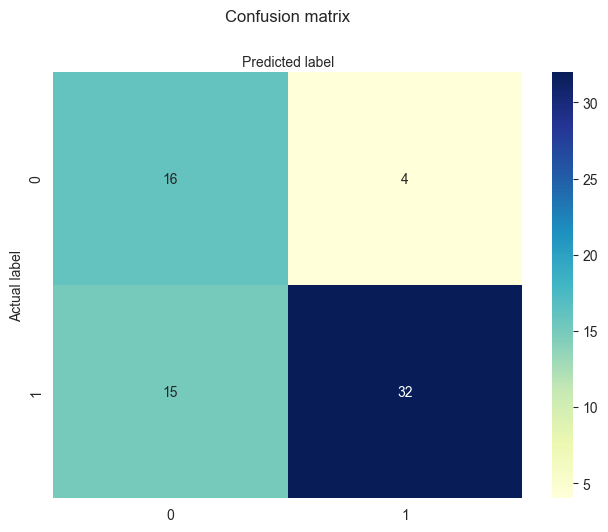

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [38]:
from sklearn.metrics import classification_report
target_names = ['double beveled', 'single']
print(classification_report(y, y_pred, target_names=target_names))



                precision    recall  f1-score   support

double beveled       0.52      0.80      0.63        20
        single       0.89      0.68      0.77        47

      accuracy                           0.72        67
     macro avg       0.70      0.74      0.70        67
  weighted avg       0.78      0.72      0.73        67


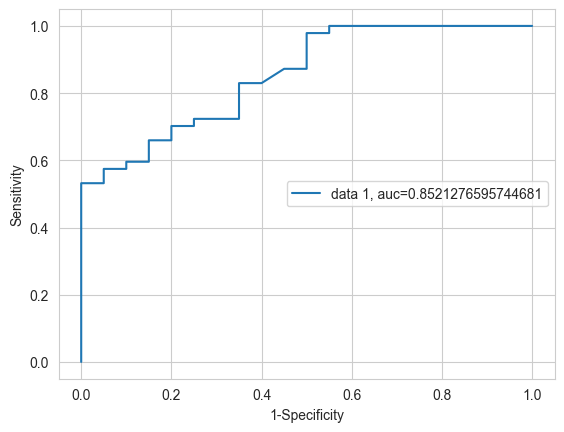

In [39]:
y_pred_proba = model.predict_proba(prepare_dataset(test_dataset_file, input_cols))[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc=5)
plt.show()

In [40]:
# filter data for the new dataframe
df = pd.read_excel(train_dataset_file)
x_df = df[input_cols].apply(lambda x: x.str.strip())
x = pd.get_dummies(x_df, drop_first=True)

result = model.predict(x)
print(result)
# this paragraph was created to see if single or even bladed corresponded either False or True
# True corresponds to single

[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True False False False False False False False  True  True
 False False False False False False False  True  True  True  True False
 False False False False False False False False  True  True  True False
 False False False False False  True  True  True False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
  True False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False  True  True  True  True  T

In [41]:
# filter data for the new dataframe
df = pd.read_excel(test_dataset_file)
label = df["label"]
string_expresult = df["result"]

x_df = df[input_cols].apply(lambda x: x.str.strip())
x = pd.get_dummies(x_df, drop_first=True)

result = model.predict(x)

print(string_expresult)
print(result)

0     single
1     single
2     single
3     single
4     single
       ...  
62    single
63    single
64    single
65    single
66    single
Name: result, Length: 67, dtype: object
[ True  True False False  True False False  True  True False  True False
  True False False  True False  True False False  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True False  True
 False False False False False False False]


In [42]:
# to organize better the things, we have to create a new list for the "result" and transform them in boolean
expected_result = []
for x in string_expresult:

    if x == "single":
        expected_result.append(True)
    
    else:
        expected_result.append(False)

print(expected_result)


[True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [43]:
#build dataframe with result, expected result and label 

data = {'label': label, 'result': result, "expected_result" : expected_result}  
  
# Create DataFrame  
df = pd.DataFrame(data)  
   
print(df)  

grouped_df = df.groupby(by = "label")

print(grouped_df.head())

    label  result  expected_result
0       2    True             True
1       2    True             True
2       2   False             True
3       2   False             True
4       2    True             True
..    ...     ...              ...
62      1   False             True
63      1   False             True
64      1   False             True
65      1   False             True
66      1   False             True

[67 rows x 3 columns]
    label  result  expected_result
0       2    True             True
1       2    True             True
2       2   False             True
3       2   False             True
4       2    True             True
10      4    True            False
11      4   False            False
12      4    True            False
13      4   False            False
14      4   False            False
20      7    True             True
21      7    True             True
22      7    True             True
23      7    True             True
24      7    True             Tr

In [44]:

# calculate the accuracy for the four knives that are single blade 

one = grouped_df.get_group(1)
five = grouped_df.get_group(5)
six = grouped_df.get_group(6)
seven = grouped_df.get_group(7)

single_bladed = pd.concat([one, five, six, seven], ignore_index= True)
print(f'single bladed\n{single_bladed}\n')
single_bladed_accuracy = calculate_accuracy(single_bladed)

print( "For single blade class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", single_bladed_accuracy, "\n")

single bladed
    label  result  expected_result
0       1    True             True
1       1   False             True
2       1    True             True
3       1   False             True
4       1   False             True
5       1   False             True
6       1   False             True
7       1   False             True
8       1   False             True
9       1   False             True
10      5    True             True
11      5    True             True
12      5    True             True
13      5    True             True
14      5    True             True
15      5    True             True
16      5    True             True
17      5    True             True
18      5    True             True
19      6    True             True
20      6    True             True
21      6    True             True
22      6   False             True
23      6    True             True
24      6    True             True
25      6    True             True
26      6    True             True
27    

In [45]:
# calculate accuracy of the double-edge class
two = grouped_df.get_group(2)
three = grouped_df.get_group(3)
four = grouped_df.get_group(4)

even_bladed = pd.concat([two, three, four], ignore_index= True)
print(f'even bladed\n{even_bladed}\n')
even_bladed_accuracy = calculate_accuracy(even_bladed)

print( "For even blade class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", even_bladed_accuracy, "\n")

even bladed
    label  result  expected_result
0       2    True             True
1       2    True             True
2       2   False             True
3       2   False             True
4       2    True             True
5       2   False             True
6       2   False             True
7       2    True             True
8       2    True             True
9       2   False             True
10      3   False            False
11      3   False            False
12      3   False            False
13      3   False            False
14      3   False            False
15      3   False            False
16      3   False            False
17      3   False            False
18      3   False            False
19      3   False            False
20      4    True            False
21      4   False            False
22      4    True            False
23      4   False            False
24      4   False            False
25      4    True            False
26      4   False            False
27      

In [46]:
# accuracy for even bladed without the knife number 4

two = grouped_df.get_group(2)
three = grouped_df.get_group(3)


even_bladed = pd.concat([two, three], ignore_index= True)
print(f'even bladed\n{even_bladed}\n')
even_bladed_accuracy = calculate_accuracy(even_bladed)

print( "For even blade class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", even_bladed_accuracy, "\n")

even bladed
    label  result  expected_result
0       2    True             True
1       2    True             True
2       2   False             True
3       2   False             True
4       2    True             True
5       2   False             True
6       2   False             True
7       2    True             True
8       2    True             True
9       2   False             True
10      3   False            False
11      3   False            False
12      3   False            False
13      3   False            False
14      3   False            False
15      3   False            False
16      3   False            False
17      3   False            False
18      3   False            False
19      3   False            False

For even blade class
accuracy %: 75.0 


In [47]:
for name, sub_df in grouped_df:
    print(f'{name}\n{sub_df}\n')

1
    label  result  expected_result
57      1    True             True
58      1   False             True
59      1    True             True
60      1   False             True
61      1   False             True
62      1   False             True
63      1   False             True
64      1   False             True
65      1   False             True
66      1   False             True

2
   label  result  expected_result
0      2    True             True
1      2    True             True
2      2   False             True
3      2   False             True
4      2    True             True
5      2   False             True
6      2   False             True
7      2    True             True
8      2    True             True
9      2   False             True

3
    label  result  expected_result
29      3   False            False
30      3   False            False
31      3   False            False
32      3   False            False
33      3   False            False
34      3   False      

In [48]:
for name, sub_df in grouped_df:
    accuracy_perc = calculate_accuracy(sub_df)
    
    print( "knife:", name) 
    print( "accuracy %:", accuracy_perc, "\n")

knife: 1
accuracy %: 20.0 

knife: 2
accuracy %: 50.0 

knife: 3
accuracy %: 100.0 

knife: 4
accuracy %: 60.0 

knife: 5
accuracy %: 100.0 

knife: 6
accuracy %: 88.88888888888889 

knife: 7
accuracy %: 88.88888888888889 


In [49]:
for name, sub_df in grouped_df:
    error_rate = calculate_error_rate(sub_df)
    
    print( "knife:", name)
    print( "error rate %:", error_rate, "\n")

knife: 1
error rate %: 80.0 

knife: 2
error rate %: 50.0 

knife: 3
error rate %: 0.0 

knife: 4
error rate %: 40.0 

knife: 5
error rate %: 0.0 

knife: 6
error rate %: 11.111111111111114 

knife: 7
error rate %: 11.111111111111114 


In [50]:
# Model optimisation, search for the optimal parameter combination
# Printing score best and worst model
optimizer_results = run_input_optimizer(train_dataset_file, test_dataset_file, input_cols, result_col)

print('Max score: ' + str(optimizer_results['max_score']))
print('Best columns combination: ' + str(optimizer_results['max_score_cols']))
print('Min score: ' + str(optimizer_results['min_score']))
print('Worse columns combination: ' + str(optimizer_results['min_score_cols']))

# Convert from tuple to list for easier use later
optimized_input_cols = list(optimizer_results['max_score_cols'])
optimized_model = optimizer_results['max_score_model']
filename = '../models/blade-bevel-optimized.pickle'
pickle.dump(optimized_model, open(filename, 'wb'))

print(f'Saved optimized model to {filename}')



Testing combinations of length 2
Testing combinations of length 3


KeyboardInterrupt: 

In [51]:
overfitting_results = run_input_optimizer_2(train_dataset_file, test_dataset_file, input_cols, result_col)
print(overfitting_results)

Testing combinations of length 5
Testing combinations of length 6
Testing combinations of length 7
Testing combinations of length 8
Testing combinations of length 9
Testing combinations of length 10
([0.00015991471215348607, 0.0007995735607675414, 0.0007995735607675414], [('shape', 'profile_entrance', 'rising_entrance', 'rising_exit', 'shards'), ('shape', 'profile_entrance', 'rising_entrance', 'rising_exit', 'feathering'), ('shape', 'profile_entrance', 'rising_entrance', 'rising_exit', 'feathering')])


In [ ]:
# filter data for the new dataframe
df = pd.read_excel(test_dataset_file)
label = df["label"]
# Inline conversion from str to bool
expected_result = df["result"].map(lambda exp_res: True if exp_res == 'single' else False)

x_df = df[optimized_input_cols].apply(lambda x: x.str.strip())
x = pd.get_dummies(x_df, drop_first=True)

result = optimized_model.predict(x)

print(f'Expected result:\n{expected_result}')
print(f'Actual result:\n{result}')

In [ ]:
#build dataframe with result, expected result and label 

data = {'label': label, 'result': result, "expected_result" : expected_result}  
  
# Create DataFrame  
df = pd.DataFrame(data)  
   
print(df)  

grouped_df = df.groupby(by = "label")

print(grouped_df.head())

In [ ]:
# Optimized model: calculate the accuracy for the four knives that are single blade 

one = grouped_df.get_group(1)
five = grouped_df.get_group(5)
six = grouped_df.get_group(6)
seven = grouped_df.get_group(7)

single_bladed = pd.concat([one, five, six, seven], ignore_index= True)
print(f'single bladed\n{single_bladed}\n')
single_bladed_accuracy = calculate_accuracy(single_bladed)

print( "For single blade class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", single_bladed_accuracy, "\n")

In [ ]:
# Optimized model: calculate the accuracy for the four knives that are even blade

two = grouped_df.get_group(2)
three = grouped_df.get_group(3)
four = grouped_df.get_group(4)

even_bladed = pd.concat([two, three, four], ignore_index= True)
print(f'even bladed\n{even_bladed}\n')
even_bladed_accuracy = calculate_accuracy(even_bladed)

print( "For even blade class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", even_bladed_accuracy, "\n")

In [ ]:
for name, sub_df in grouped_df:
    accuracy_perc = calculate_accuracy(sub_df)
    error_rate_perc = calculate_error_rate(sub_df)
    
    print( "knife:", name) 
    print( "accuracy %:", accuracy_perc)
    print( "error rate %:", error_rate_perc, "\n")

In [ ]:
# tex = "$$p = {\frac{1}{1 + e ^ {-(\beta_0 + \beta_1X_i + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5)}}}$$"
# tex = "$$p = {\frac{1}{1 + e ^ {-(3 + 2X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5)}}}$$"
tex = r"$$p = {\frac{1}{1 + e ^ {-("

# Add intercept
tex += str(np.round(model.intercept_[0], decimals=2))

 
# Add coefficients
for i, b in enumerate(model.coef_[0]):
    if b < 0:
        sign = '-'
    elif b > 0:
        sign = '+'
    else:
        continue
    tex += f"{sign}{str(np.abs(np.round(b, decimals=2)))}x_{{{str(i+1)}}}"

tex += ")}}}$$"

widgets.HTMLMath(
    value=tex,
    placeholder='Logistic regression',
)